In [449]:
import random as rn
import numpy as np
from random import randint,shuffle,uniform, random
from time import time
from itertools import repeat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re

Сравнение функций библиотек random и numpy

<AxesSubplot:>

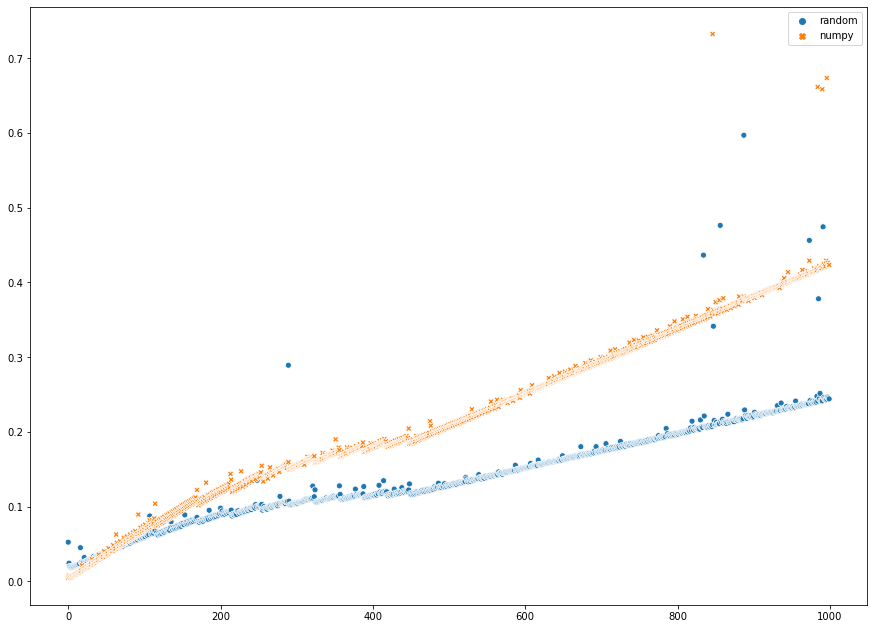

In [642]:
def timeit(method):
    def timed(*args, **kw):
        ts = time()
        result = method(*args, **kw)
        te = time()
        time_of_method = (te - ts) * 1000
        return time_of_method

    return timed


random_res = []
numpy_res = []


@timeit
def numpy_sort(c):
    return [i for i in np.random.sample(c)]


@timeit
def random_sort(c):
    return [rn.random() for _ in range(c)]


for i in range(1000):
    random_res.append(numpy_sort(i))
    numpy_res.append(random_sort(i))

rand_diff_df = pd.DataFrame({'random': random_res, 'numpy': numpy_res})
plt.figure(figsize=(15, 11))
sns.scatterplot(data=rand_diff_df)


Monkey sort.

Использован код из:

https://github.com/bfaure/Python_Algorithms/blob/master/bogo_sort/main.py
https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
https://stackoverflow.com/questions/7201715/how-to-change-a-functions-return-using-a-decorator

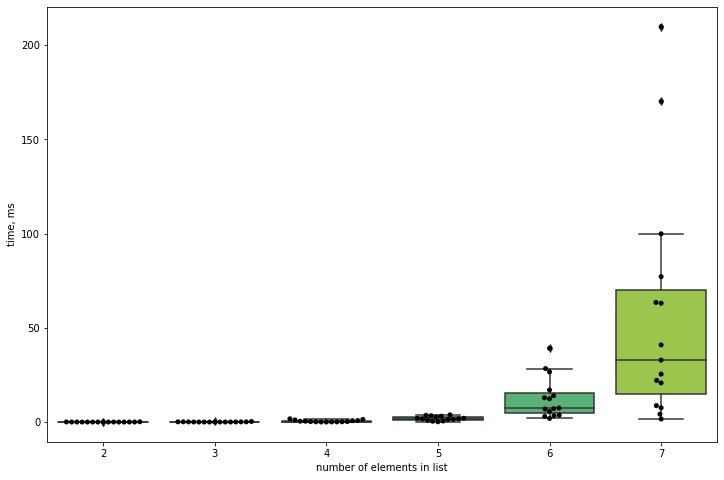

In [643]:
def create_array(size=10, max=50):
    return [randint(0, max) for _ in range(size)]


def is_sorted(l) -> bool:
    return all(l[i] <= l[i + 1] for i in range(len(l) - 1))


@timeit
def bogosort(data) -> list:
    while not is_sorted(data):
        shuffle(data)
    return data


list_for_bo = []
for i in range(2, 8):
    inner_list = []
    for _ in range(15):
        inner_list.append(bogosort(create_array(i)))
    list_for_bogo.append(inner_list)

df_rand = pd.DataFrame(list_for_bogo)
df_rand = df_rand.transpose()
df_rand.columns = range(2, 8)

plt.figure(figsize=(12, 8))
sns.boxplot(data=dfrand,
            palette="viridis"
            )
figurine = sns.swarmplot(data=df_rand,
                         color="black")
plt.xlabel("number of elements in list")
plt.ylabel("time, ms")
plt.show(figurine)


Random walk.

<AxesSubplot:xlabel='x', ylabel='y'>

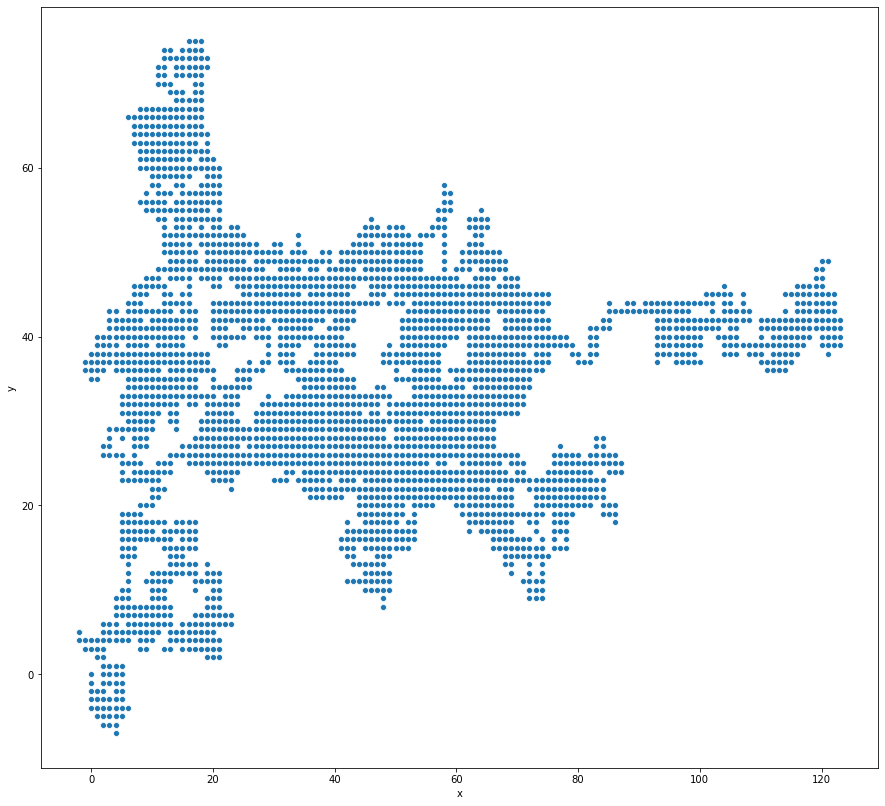

In [226]:
x = [0]
y = [0]

for _ in range(10000):
    a = randint(1, 4)
    pos = len(x) - 1
    if a == 1:
        x.append(x[pos] + 1)
        y.append(y[pos])
    elif a == 2:
        x.append(x[pos] - 1)
        y.append(y[pos])
    elif a == 3:
        x.append(x[pos])
        y.append(y[pos] + 1)
    else:
        x.append(x[pos])
        y.append(y[pos] - 1)

df_walk = pd.DataFrame({'x': x, 'y': y})
plt.figure(figsize=(15, 14))

sns.scatterplot(data=dfwalk, x="x", y="y")


http://bopace.github.io/python/2016/06/09/python-turtle-sierpinski/

Sierpiński triangle

<AxesSubplot:xlabel='x', ylabel='y'>

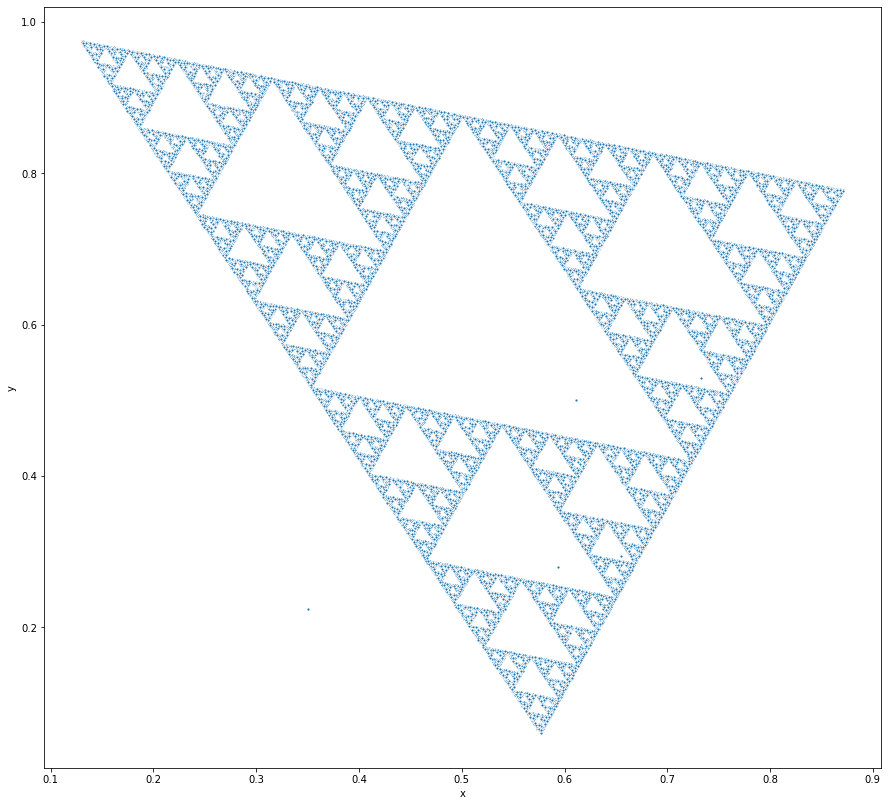

In [371]:
v1 = [uniform(0, 1), uniform(0, 1)]
v2 = [uniform(0, 1), uniform(0, 1)]
v3 = [uniform(0, 1), uniform(0, 1)]

x = [uniform(0, 1)]
y = [uniform(0, 1)]

for _ in range(100000):
    a = randint(1, 3)
    pos = len(x) - 1
    if a == 1:
        x.append((x[pos] + v1[0]) / 2)
        y.append((y[pos] + v1[1]) / 2)
    if a == 2:
        x.append((x[pos] + v2[0]) / 2)
        y.append((y[pos] + v2[1]) / 2)
    if a == 3:
        x.append((x[pos] + v3[0]) / 2)
        y.append((y[pos] + v3[1]) / 2)

df_serp = pd.DataFrame({'x': x, 'y': y})
df_ver = pd.DataFrame([v1, v2, v3])
df_serp.append(df_ver)
plt.figure(figsize=(15, 14))

sns.scatterplot(data=df_serp, x="x", y="y", marker=".")


Text randomisation.

https://stackoverflow.com/questions/4452102/how-to-get-plain-text-out-of-wikipedia
https://stackoverflow.com/questions/2779453/python-strip-everything-but-spaces-and-alphanumeric
https://stackoverflow.com/questions/20601480/randomize-letters-in-a-word

In [583]:
response = requests.get(
    'https://ru.wikipedia.org/w/api.php',
    params={
        'action': 'query',
        'format': 'json',
        'titles': 'Ковёр_Серпинского',
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True,
    }
).json()
page = next(iter(response['query']['pages'].values()))
text_input = page['extract']
only_alpha = re.sub(r"([^\s\w]|_)+", " ", text_input)

result = []
for i in only_alpha.split(" "):
    if len(i) > 3:
        st, mid, end = i[0], i[1:-1], i[-1]
        mid_l = list(mid)
        shuffle(mid_l)
        new_word = st + ''.join(mid_l) + end
        result.append(new_word)
    else:
        result.append(i)
print(*result)


Коёвр Соснкиергпо  крадавт Скнсгпоиеро    фтаакрл  оидн из двыунермх агаонлов мвтжноеса Катонра  пеолынджрней пьксилом ммакиетотам Ваалоцвм Сснпиерикм в 1916 г 


Sierpiński carpet

https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%B2%D1%91%D1%80_%D0%A1%D0%B5%D1%80%D0%BF%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B3%D0%BE

<AxesSubplot:xlabel='x', ylabel='y'>

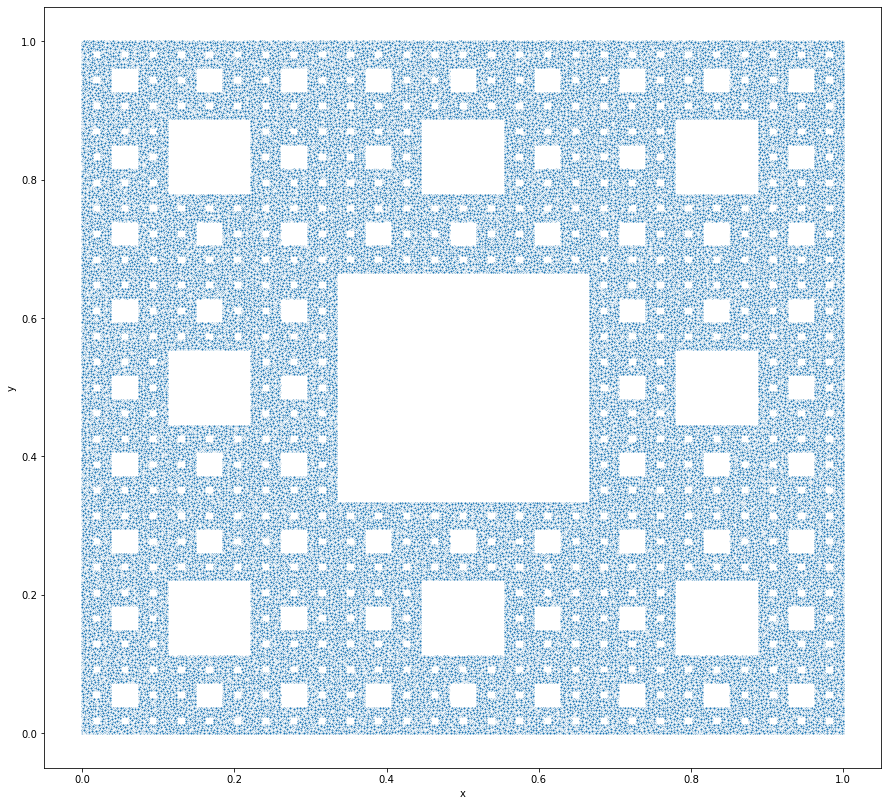

In [603]:
attr = [[0, 0], [0.5, 0], [1, 0], [0, 0.5], [1, 0.5], [0, 1], [0.5, 1], [1, 1]]
first = [[uniform(0, 1), uniform(0, 1)]]


def calc(P, attr_active):
    new = [0, 0]
    new[0] += (P[0] + 2 * attr_active[0]) / 3
    new[1] += (P[1] + 2 * attr_active[1]) / 3
    return new


for _ in range(1000000):
    a = [uniform(0, 1), uniform(0, 1)]
    if a[0] < 1 / 3 and a[1] < 1 / 3:
        first.append(calc(first[-1], attr[0]))
    elif 2 / 3 > a[0] > 1 / 3 > a[1]:
        first.append(calc(first[-1], attr[1]))
    elif a[0] > 2 / 3 and a[1] < 1 / 3:
        first.append(calc(first[-1], attr[2]))
    elif a[0] < 1 / 3 < a[1] < 2 / 3:
        first.append(calc(first[-1], attr[3]))
    elif a[0] > 2 / 3 > a[1] > 1 / 3:
        first.append(calc(first[-1], attr[4]))
    elif a[0] < 1 / 3 and a[1] > 2 / 3:
        first.append(calc(first[-1], attr[5]))
    elif 1 / 3 < a[0] < 2 / 3 < a[1]:
        first.append(calc(first[-1], attr[6]))
    else:
        first.append(calc(first[-1], attr[7]))

df_ser_s = pd.DataFrame(first, columns=['x', 'y'])

plt.figure(figsize=(15, 14))
sns.scatterplot(data=df_ser_s, x="x", y="y", marker=".")
